<a href="https://colab.research.google.com/github/nikita-0209/stock_price_detection/blob/master/Vanilla_Python_Random_Walk_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
totSteps=100
dim = 2*totSteps+1

In [3]:
iota = complex(0, 1)

In [4]:
probArr= np.zeros(dim)

In [5]:
phiArr = np.zeros((dim, 2))
posArr = np.arange(-100, 101, 1)

## Hadamard

In [6]:
theta=45*np.pi/180
P=[[np.cos(theta), np.sin(theta)], [0, 0]]
Q=[[0, 0], [np.sin(theta), -np.cos(theta)]]

## Y Operator

In [7]:
# theta=45*np.pi/180
# P=[[np.cos(theta), iota*np.sin(theta)], [0, 0]]
# Q=[[0, 0], [iota*np.sin(theta), np.cos(theta)]]

# The Simulation

### Initialisation

In [8]:
phiArr[totSteps] = [1, 0]
probArr[totSteps] = 1

In [9]:
for t in range(1, totSteps+1):
  phiArrUpdate=[0]*len(phiArr)
  for pos in range(0, 2*totSteps+1):
    if pos==0:
      phiArrUpdate[0] = np.inner(P, phiArr[1])
    elif pos==2*totSteps:
      phiArrUpdate[2*totSteps]= np.inner(Q, phiArr[2*totSteps-1])
    else:
      phiArrUpdate[pos]=np.inner(P, phiArr[pos+1]) + np.inner(Q, phiArr[pos-1])
    
    probArr[pos] = np.dot(phiArrUpdate[pos], phiArrUpdate[pos])
  phiArr = phiArrUpdate

In [10]:
evenStep = []
evenProb =[]
for i in range(0, len(posArr), 2):
  evenStep.append(posArr[i])
  evenProb.append(probArr[i])

## Probability Distribution

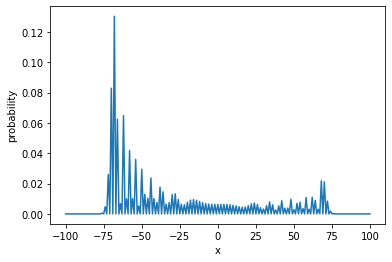

In [11]:
plt.xlabel("x")
plt.ylabel("probability")
plt.plot(posArr, probArr)

## Clean Graph

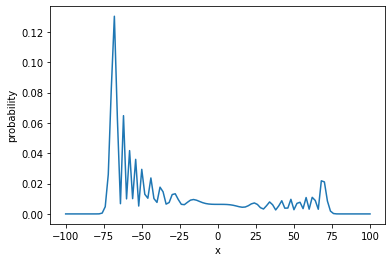

In [12]:
plt.xlabel("x")
plt.ylabel("probability")
plt.plot(evenStep, evenProb)